# Example

In [1]:
import silmaril
import astropy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = astropy.coordinates.SkyCoord(24.3468342,-8.4645026,unit="deg")
image_plane = silmaril.Grid(s,1000,0.031)
wcs = astropy.wcs.WCS(astropy.io.fits.open('hlsp_relics_model_model_whl0137-08_glafic_v1_x-arcsec-deflect.fits')[0].header)
x_deflections = silmaril.open_fits("hlsp_relics_model_model_whl0137-08_glafic_v1_x-arcsec-deflect.fits")
y_deflections = silmaril.open_fits("hlsp_relics_model_model_whl0137-08_glafic_v1_y-arcsec-deflect.fits")

In [3]:
lens = silmaril.Lens(x_deflections,y_deflections,wcs,redshift=0.566,unit='arcsec')
detector = silmaril.Detector(resolution=0.031,fov=30,center=astropy.coordinates.SkyCoord(24.34819561, -8.46520946,unit="deg"),psf_fwhm=2.065)

In [4]:
conv = lens.convergence(image_plane,6.2)
mag_line = lens.magnification_line(image_plane,6.2)

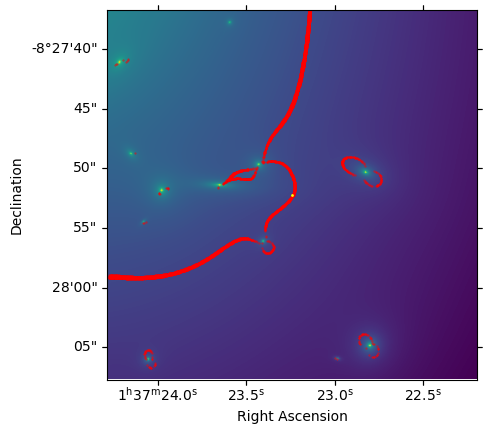

In [5]:
ax = plt.subplot(projection=image_plane.wcs)
ax.imshow(np.log10(abs(conv)),origin="lower")
ax.scatter(mag_line[:,0],mag_line[:,1],s=0.1,color="red",transform=ax.get_transform('world'))
ax.scatter(24.3468342,-8.4645026,s=1,color="yellow",transform=ax.get_transform('world'))
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

In [6]:
lens.trace_points([[24.3468342,-8.4645026]],6.2)

array([24.35380691, -8.45843597])

In [6]:
galaxy = silmaril.Galaxy("pos_00447_468_99_myr.txt",redshift=6.2,size=200,center=astropy.coordinates.SkyCoord(24.35378054, -8.45843384,unit="deg"))
observation = silmaril.Observation(detector,lens,galaxy)

(<Figure size 640x480 with 2 Axes>, <WCSAxes: >)

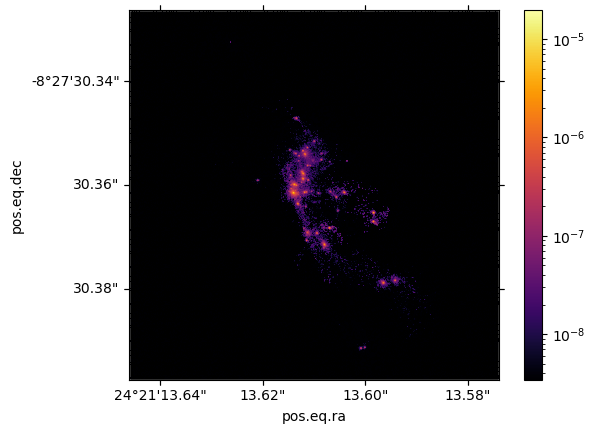

In [7]:
galaxy.plot(resolution=1000)

In [11]:
galaxy.pixel_scale(resolution=1000,zoom_factor=1)

7.122787209721469e-05

In [11]:
lensed_image = observation.simulate_observation(background=3e-11,noise=5e-12,source_resolution=1000,star_by_star=True)

(<Figure size 640x480 with 2 Axes>, <WCSAxes: >)

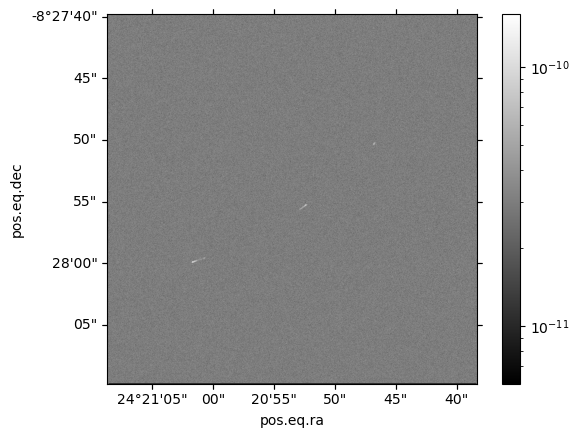

In [13]:
observation.plot(background=3e-11,noise=5e-12,source_resolution=1000,star_by_star=False)

(<Figure size 640x480 with 2 Axes>, <WCSAxes: >)

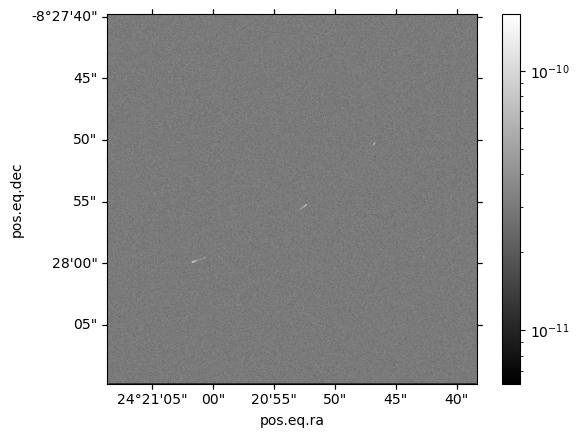

In [15]:
observation.plot(background=3e-11,noise=5e-12,source_resolution=1000,star_by_star=True)

(<Figure size 640x480 with 2 Axes>, <WCSAxes: >)

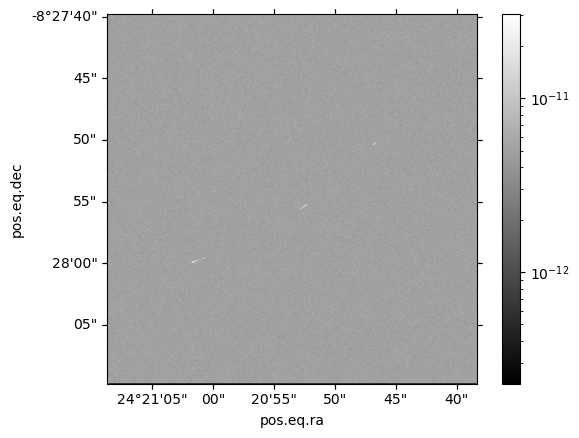

In [17]:
observation.plot(background=5e-12,noise=1e-12,source_resolution=1000,filter_name="F200W")

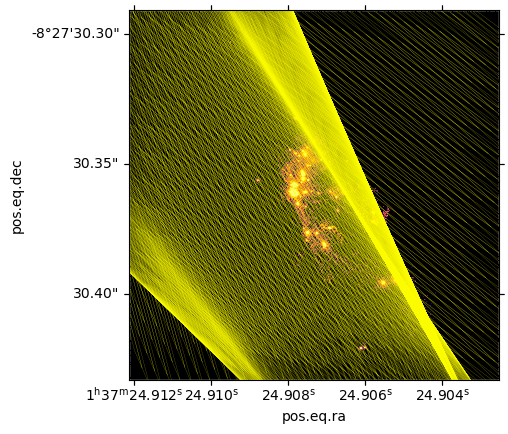

In [13]:
from matplotlib.patches import Polygon
import matplotlib as mpl
from matplotlib.colors import LogNorm
nonempty_pixels, arc_pixels, polygons, luminosities = observation.trace_pixels(source_resolution=1000,zoom_factor=2)

ax = plt.subplot(projection=galaxy.grid(1000,2).wcs)
ax.imshow(galaxy.create_image(resolution=1000,zoom_factor=2),norm=LogNorm(1e-9,1e-7),cmap="inferno")
polygons = [Polygon(p,closed=True,fill=False,color="yellow",lw=0.1,transform=ax.get_transform('world')) for p in polygons]

ax.set_facecolor('black')
for i,p in enumerate(polygons):
    ax.add_patch(p)